# Exploratory Data Analysis: Forward Position

Recall that our **y**-values are the proportion of the salary cap that a general manager is willing to spend on a player in a given year. To estimate how much this value is, given a players performance metrics, we need to dive into the data and figure out what metrics have a strong relationship with our **y**'s.

Based on my knowledge of hockey, I highly suspect that the features will differ for the different positions that exist in hockey: Forward, Defence, and Goalie. To begin, I will explore the data with respect to the Forward position.

In [53]:
import pandas as pd
import dataprep as dp
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import plot

In [54]:
# Load in our data
filepath = '../../Data/entitiesResolved/merged_data_final.csv'
data = pd.read_csv(filepath)

Now we need to select only those players that play Forward.

In [55]:
# Get all the unique values in the 'Position' col
data['POSITION'].unique()

array(['r', 'd', 'l', 'c, l', 'c', 'l, r', 'c, r', 'd, l'], dtype=object)

We note that there are some players here who play 'd, l'. There is only a single entry in this regard. We will defer that record to the analysis of defencemen.

In [56]:
# Select all rows were the 'Position' is 'c' or 'c,l' or 'c,r'
forwards = data[data['POSITION'].isin(['r', 'l', 'c, l', 'c', 'l, r', 'c, r'])]
print(forwards['POSITION'].unique())
print(forwards.shape)

['r' 'l' 'c, l' 'c' 'l, r' 'c, r']
(8404, 173)


Now there's going to be some strange numbers in our data if we include players who have only played a few games, and happened to perform quite well. So, let's choose a value of 41 GP which represents 1/2 of the season. This way we can get rid of players who have only really had a small taste of the NHL in a given season. Hopefully this doesn't truncate our data too much.

In [57]:
forwards_41GP = forwards[forwards['GP'] >= 41]
forwards_41GP.shape

(5511, 173)

We have reduced our records by nearly 2893, but we still have 5511 to work with, which seems like a healthy amount.

In [58]:
# plot(forwards_41GP)

## Correlation Matrix

To start our EDA, I want to perform a correlation analysis and zoom in on any features that are highly correlated with our **y** values.

/var/folders/jd/f_rvzywd5j7g5f9ckcp7wsxr0000gp/T/ipykernel_77087/2949392088.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = forwards_41GP.corr()


<Axes: >

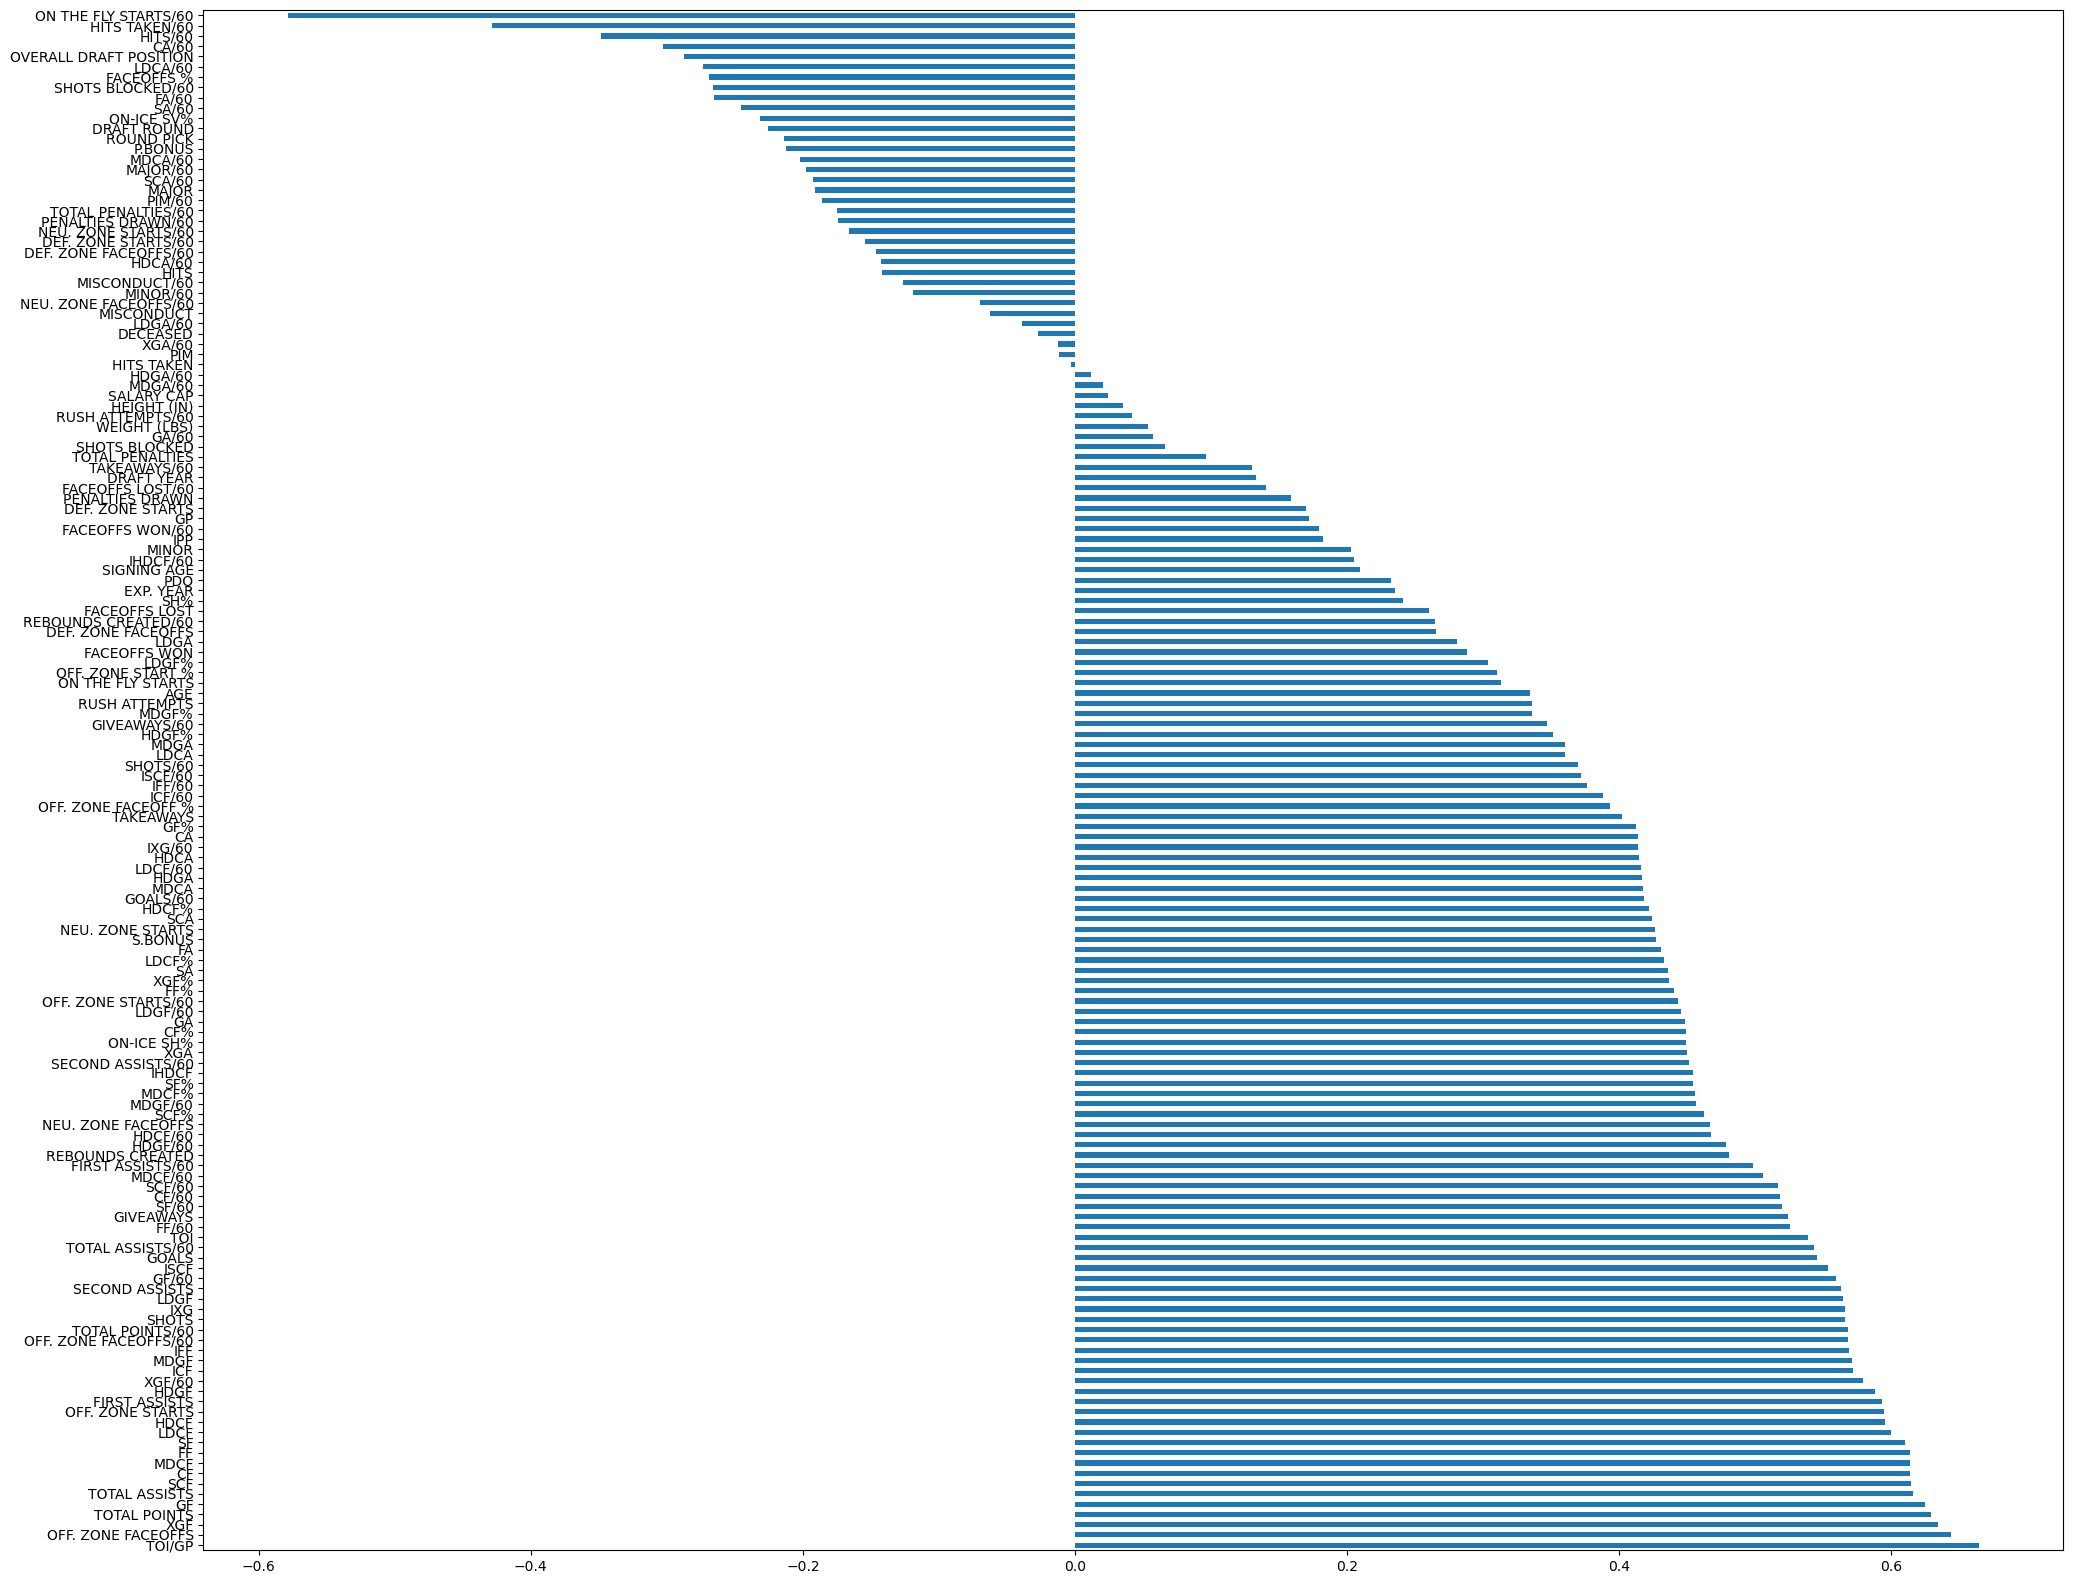

In [59]:
correlation_matrix = forwards_41GP.corr()

# Extract all correlations with 'Y_SALARY_CAP_PERCENTAGE' and sort them
correlation_Y = correlation_matrix['SALARY CAP PERCENTAGE'].sort_values(ascending=False)

# Remove Y_SALARY_CAP_PERCENTAGE and LENGTH from the list
correlation_Y = correlation_Y.drop(['SALARY CAP PERCENTAGE', 'LENGTH', 'CAP HIT', 'AAV', 'SALARY', 'BASE SALARY'])

# Create a barplot of the correlations
plt.figure(figsize=(24, 20))
correlation_Y.plot(kind='barh')

This is looking pretty promising. One thing that may help is to pull out the top 20 or 30 features that have high absolute correlation values, and graph them.

In [60]:
# Sort the values of 'Y_SALARY_CAP_PERCENTAGE' by the absolute value
correlation_Y_abs = correlation_Y.abs().sort_values(ascending=False)

<Axes: >

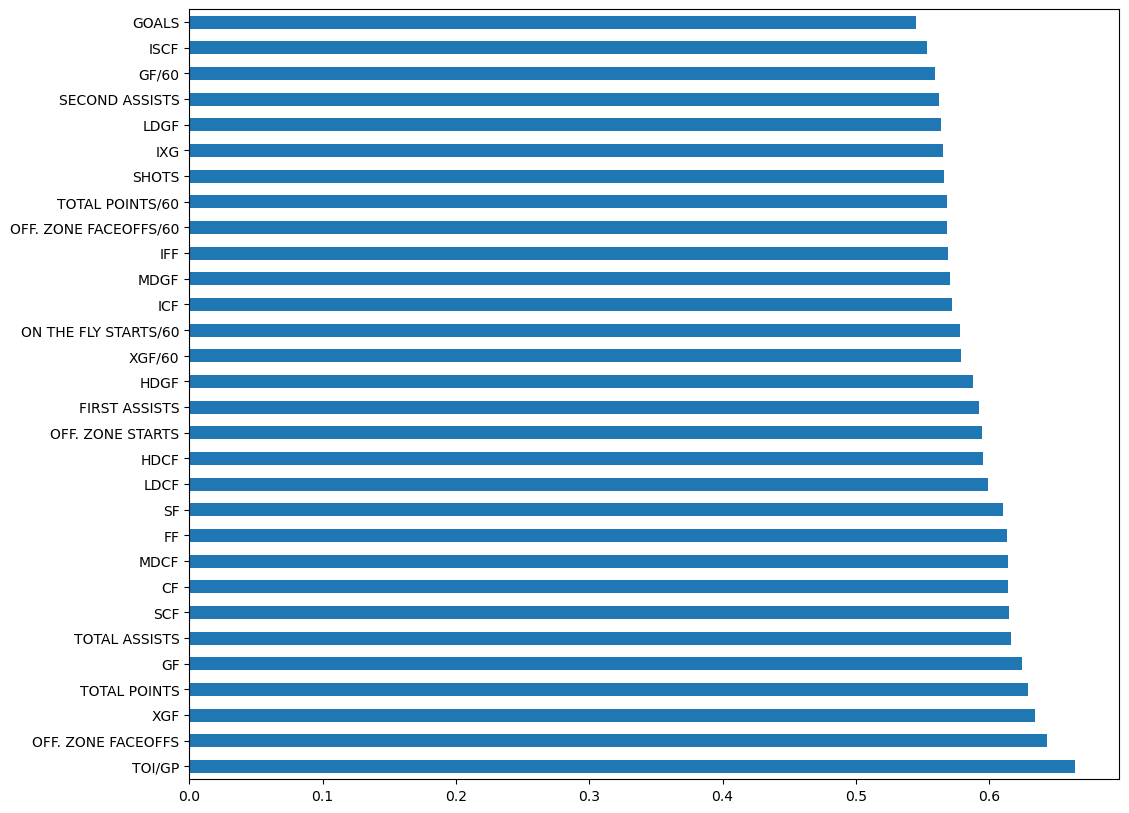

In [62]:
# Create a barplot of the top 20 correlations
plt.figure(figsize=(12, 10))
correlation_Y_abs[:30].plot(kind='barh')

In [108]:
correlation_Y_abs[:30].index.tolist()

['TOI/GP',
 'OFF.\xa0ZONE FACEOFFS',
 'XGF',
 'TOTAL POINTS',
 'GF',
 'TOTAL ASSISTS',
 'SCF',
 'CF',
 'MDCF',
 'FF',
 'SF',
 'LDCF',
 'HDCF',
 'OFF.\xa0ZONE STARTS',
 'FIRST ASSISTS',
 'HDGF',
 'XGF/60',
 'ON\xa0THE\xa0FLY STARTS/60',
 'ICF',
 'MDGF',
 'IFF',
 'OFF.\xa0ZONE FACEOFFS/60',
 'TOTAL POINTS/60',
 'SHOTS',
 'IXG',
 'LDGF',
 'SECOND ASSISTS',
 'GF/60',
 'ISCF',
 'GOALS']

## Interesting Finding

Something I find quite interesting here is the strong (negative) correlation with On the fly starts per 60 minutes. An interesting element of hockey is the fact that players on the ice can swap with players on the bench, making an "on the fly" shift change in the middle of action. The strong negative correlation here with salary highlights the fact that these players come on the ice in the middle of play and are *less* likely to start play on the ice (at a face-off). This says something about game management and coaching decisions, suggesting that coaches want to start play with their best players on the ice. Players that frequently come onto the ice in the middle of play then are probably more likely to be used in specific game situations.

# Covariance Analysis

Next thing I'd like to look into is covariance analysis. Simply choosing the top features will not necessarily be useful if they are all themselves correlated. If we find that they are, it will probably make more sense to choose one and use that.

In [72]:
# Extract the top 30 correlated features by absolute value

top_30_features = correlation_Y.abs().nlargest(30)

high_corrs_df = forwards[top_30_features.index]
high_corrs = high_corrs_df.corr()
high_corrs

,TOI/GP,OFF. ZONE FACEOFFS,XGF,TOTAL POINTS,GF,TOTAL ASSISTS,SCF,CF,MDCF,FF,...,IFF,OFF. ZONE FACEOFFS/60,TOTAL POINTS/60,SHOTS,IXG,LDGF,SECOND ASSISTS,GF/60,ISCF,GOALS
TOI/GP,1.000000,0.833375,0.839077,0.822240,0.833280,0.796926,0.833424,0.836453,0.832482,0.837264,...,0.794798,0.517687,0.610453,0.793682,0.799725,0.772197,0.754875,0.563202,0.799222,0.775763
OFF. ZONE FACEOFFS,0.833375,1.000000,0.973080,0.943036,0.960270,0.910291,0.971434,0.975189,0.970259,0.974880,...,0.925689,0.628190,0.620648,0.923478,0.926432,0.893757,0.866827,0.580980,0.929584,0.894928
XGF,0.839077,0.973080,1.000000,0.957011,0.974708,0.921892,0.994613,0.987682,0.986534,0.988461,...,0.943128,0.551909,0.629309,0.940157,0.960668,0.888477,0.874395,0.589878,0.956359,0.910833
TOTAL POINTS,0.822240,0.943036,0.957011,1.000000,0.984317,0.970596,0.952071,0.941850,0.949701,0.944529,...,0.913031,0.554493,0.707921,0.912952,0.916422,0.898261,0.914800,0.629622,0.918811,0.941541
GF,0.833280,0.960270,0.974708,0.984317,1.000000,0.949589,0.969981,0.961180,0.967725,0.963384,...,0.918341,0.563253,0.680369,0.916849,0.931189,0.917685,0.900441,0.644552,0.930923,0.934872
TOTAL ASSISTS,0.796926,0.910291,0.921892,0.970596,0.949589,1.000000,0.916113,0.906381,0.913380,0.909167,...,0.845011,0.537023,0.687457,0.845343,0.841334,0.868455,0.944519,0.606050,0.847129,0.832760
SCF,0.833424,0.971434,0.994613,0.952071,0.969981,0.916113,1.000000,0.991483,0.995475,0.991358,...,0.946092,0.540614,0.623889,0.943249,0.957286,0.880337,0.868792,0.582918,0.963172,0.907561
CF,0.836453,0.975189,0.987682,0.941850,0.961180,0.906381,0.991483,1.000000,0.988585,0.998943,...,0.951157,0.529320,0.606570,0.948231,0.950253,0.889066,0.861686,0.564965,0.955067,0.897672
MDCF,0.832482,0.970259,0.986534,0.949701,0.967725,0.913380,0.995475,0.988585,1.000000,0.988182,...,0.944168,0.544009,0.622761,0.940746,0.947861,0.885361,0.866470,0.582076,0.958588,0.905934
FF,0.837264,0.974880,0.988461,0.944529,0.963384,0.909167,0.991358,0.998943,0.988182,1.000000,...,0.953026,0.527349,0.608660,0.950601,0.951221,0.890365,0.864262,0.566497,0.955812,0.899934


## TOI/GP Multicollinearity Analysis

<Axes: >

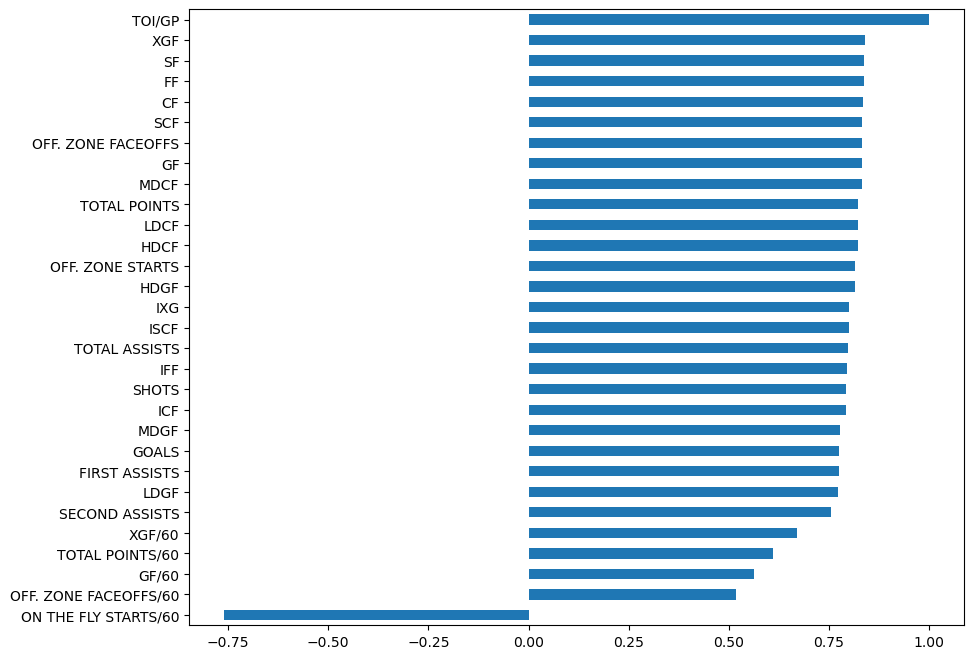

In [65]:
# Sort positive_corrs by 'TOI/GP'
TOI_corrs = high_corrs['TOI/GP'].sort_values()

# Plot a bar graph of TOI/GP vs. the top positively correlated features
plt.figure(figsize=(10, 8))
TOI_corrs.plot(kind='barh')

In [85]:
high_TOI_corrs = TOI_corrs[TOI_corrs.abs() > 0.7]
high_TOI_corrs

ON THE FLY STARTS/60   -0.759188
SECOND ASSISTS          0.754875
LDGF                    0.772197
FIRST ASSISTS           0.774623
GOALS                   0.775763
MDGF                    0.778921
ICF                     0.792519
SHOTS                   0.793682
IFF                     0.794798
TOTAL ASSISTS           0.796926
ISCF                    0.799222
IXG                     0.799725
HDGF                    0.814399
OFF. ZONE STARTS        0.816230
HDCF                    0.821794
LDCF                    0.822054
TOTAL POINTS            0.822240
MDCF                    0.832482
GF                      0.833280
OFF. ZONE FACEOFFS      0.833375
SCF                     0.833424
CF                      0.836453
FF                      0.837264
SF                      0.837297
XGF                     0.839077
TOI/GP                  1.000000
Name: TOI/GP, dtype: float64

### Advanced Metrics
Something to note here is that many of the top metrics here are what are called 'advanced metrics' instead of raw metrics. Things like Total Points, Goals, First/Second Assists are raw counts, whereas a metric like CF (Corsi For) is an advanced metric that tries to explain "what is happening on the ice" when a certain player is playing. CF, SF, and FF are combined statistics that already use several metrics in their computation.

### Results
Here we see that Time on Ice per Game Played is highly correlated with almost all of the top features. In fact, it has a positive correlation above .7 with 26 of 30 features that are mostly highly correlated with our **y** values. 

### How to proceed
The question that begs asking is what to do about this sort of multicollinearity. Should we use 'TOI/GP' and remove many, or most, of the features here that it is so highly correlated with, or should we combine them using PCA? It is not clear. My intution is to combine TOI with a number of the other advanced metrics using PCA, while leaving some of the other more standard features (like goal, assists, etc.) alone.

## XGF Multicollinearity Analysis

<Axes: >

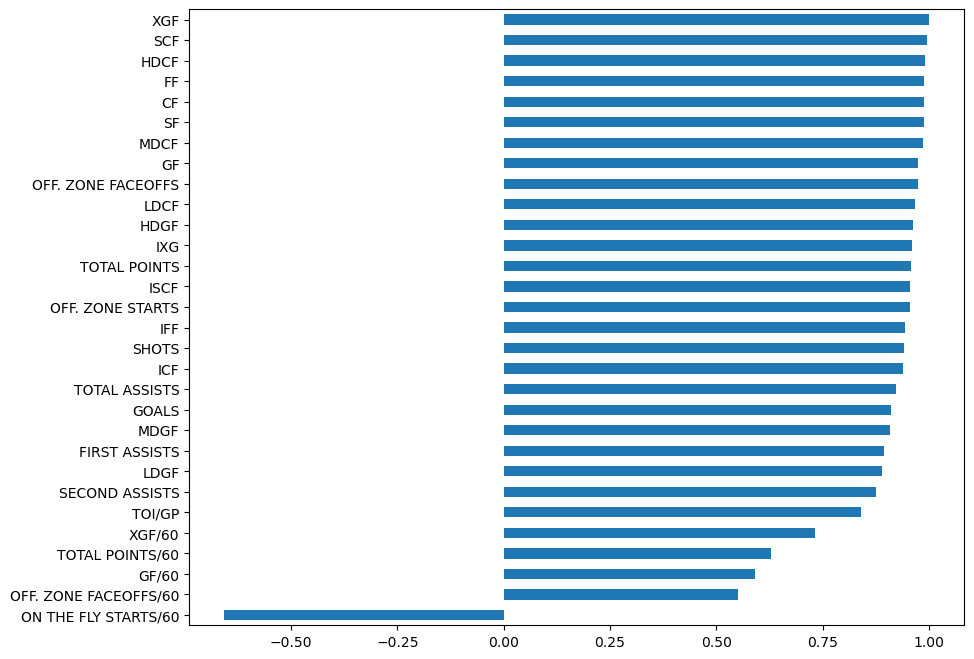

In [30]:
# Sort positive_corrs by 'TOI/GP'
XGF_corrs = high_corrs['XGF'].sort_values()

# Plot a bar graph of XGF/60 vs. the top positively correlated features, sorted by XGF/60
plt.figure(figsize=(10, 8))
XGF_corrs.plot(kind='barh')

In [84]:
high_XGF_corrs = XGF_corrs[XGF_corrs.abs() > 0.8]
high_XGF_corrs

TOI/GP                0.839077
SECOND ASSISTS        0.874395
LDGF                  0.888477
FIRST ASSISTS         0.895299
MDGF                  0.908479
GOALS                 0.910833
TOTAL ASSISTS         0.921892
ICF                   0.939293
SHOTS                 0.940157
IFF                   0.943128
OFF. ZONE STARTS      0.954529
ISCF                  0.956359
TOTAL POINTS          0.957011
IXG                   0.960668
HDGF                  0.961759
LDCF                  0.966081
OFF. ZONE FACEOFFS    0.973080
GF                    0.974708
MDCF                  0.986534
SF                    0.987117
CF                    0.987682
FF                    0.988461
HDCF                  0.990597
SCF                   0.994613
XGF                   1.000000
Name: XGF, dtype: float64

### Results

Here, again, we see a high degree of covariance across a huge range of features. My intuition says that XGF is a very important feature that we should include. Similar to TOI/GP, it is not clear how to reconcile the multicollinearity that exists across all of these features.

## TOTAL POINTS Multicollinearity Analysis

<Axes: >

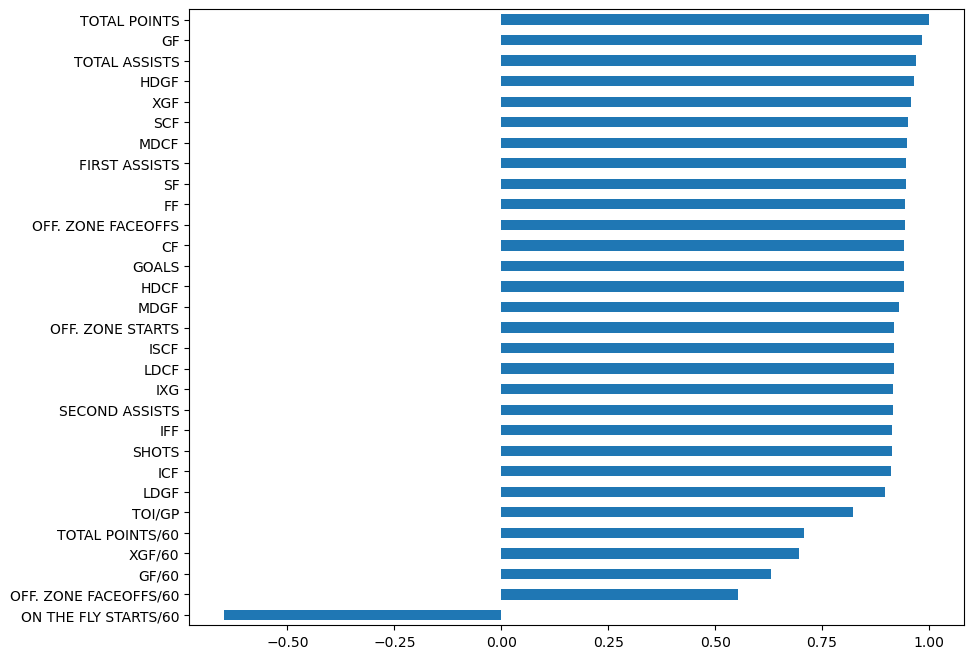

In [70]:
# Sort positive_corrs by 'TOI/GP'
TP_corrs = high_corrs['TOTAL POINTS'].sort_values()

# Plot a bar graph of TOI/GP vs. the top positively correlated features
plt.figure(figsize=(10, 8))
TP_corrs.plot(kind='barh')

In [83]:
high_TP_corrs = TP_corrs[TP_corrs.abs() > 0.8]
high_TP_corrs

TOI/GP                0.822240
LDGF                  0.898261
ICF                   0.912185
SHOTS                 0.912952
IFF                   0.913031
SECOND ASSISTS        0.914800
IXG                   0.916422
LDCF                  0.917315
ISCF                  0.918811
OFF. ZONE STARTS      0.918845
MDGF                  0.929286
HDCF                  0.940606
GOALS                 0.941541
CF                    0.941850
OFF. ZONE FACEOFFS    0.943036
FF                    0.944529
SF                    0.945677
FIRST ASSISTS         0.946599
MDCF                  0.949701
SCF                   0.952071
XGF                   0.957011
HDGF                  0.965527
TOTAL ASSISTS         0.970596
GF                    0.984317
TOTAL POINTS          1.000000
Name: TOTAL POINTS, dtype: float64

### Results

It seems there is a theme here. Total Points is also quite highly correlated with all of the other features that are highly correlated to our **y** values.

## GF Multicollinearity Analysis

<Axes: >

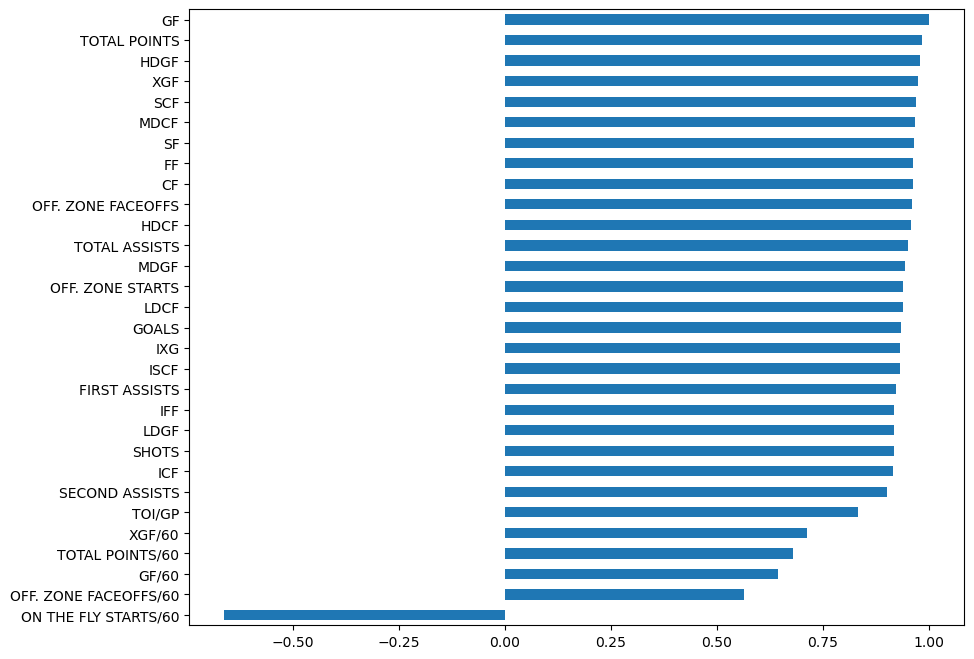

In [73]:
# Sort positive_corrs by 'GF/60'
GF_corrs = high_corrs['GF'].sort_values()

# Plot a bar graph of GF/60 vs. the top positively correlated features
plt.figure(figsize=(10, 8))
GF_corrs.plot(kind='barh')

In [82]:
high_GF_corrs = GF_corrs[GF_corrs.abs() > 0.8]
high_GF_corrs

TOI/GP                0.833280
SECOND ASSISTS        0.900441
ICF                   0.915382
SHOTS                 0.916849
LDGF                  0.917685
IFF                   0.918341
FIRST ASSISTS         0.922351
ISCF                  0.930923
IXG                   0.931189
GOALS                 0.934872
LDCF                  0.938676
OFF. ZONE STARTS      0.939563
MDGF                  0.944253
TOTAL ASSISTS         0.949589
HDCF                  0.958080
OFF. ZONE FACEOFFS    0.960270
CF                    0.961180
FF                    0.963384
SF                    0.964152
MDCF                  0.967725
SCF                   0.969981
XGF                   0.974708
HDGF                  0.977959
TOTAL POINTS          0.984317
GF                    1.000000
Name: GF, dtype: float64

### Results
The theme continues. I am beginning to suspect that the most appropriate course of action will be to use some of the more standard metrics as our features, and take some of the more advanced metrics and compile them into principal components.

## Total Assists Multicollinearity Analysis

<Axes: >

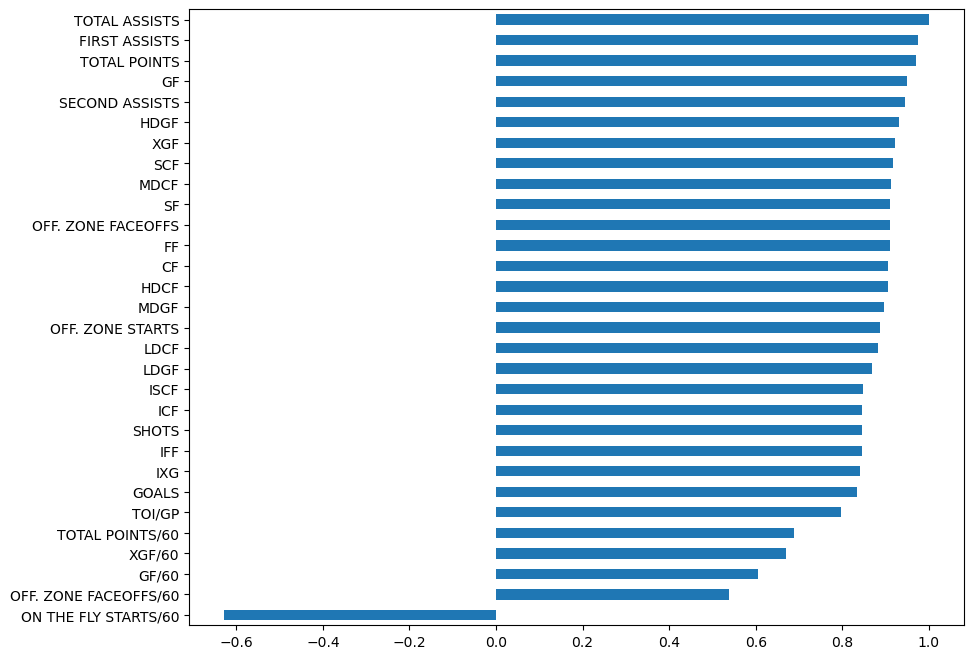

In [76]:
# Sort positive_corrs by 'TOTAL ASSISTS/60'
TotAssists_corrs = high_corrs['TOTAL ASSISTS'].sort_values()

# Plot a bar graph of TOTAL ASSISTS/60 vs. the top positively correlated features
plt.figure(figsize=(10, 8))
TotAssists_corrs.plot(kind='barh')

In [87]:
high_TotAssists_corrs = TotAssists_corrs[TotAssists_corrs.abs() > 0.8]
high_TotAssists_corrs

GOALS                 0.832760
IXG                   0.841334
IFF                   0.845011
SHOTS                 0.845343
ICF                   0.846371
ISCF                  0.847129
LDGF                  0.868455
LDCF                  0.882977
OFF. ZONE STARTS      0.886148
MDGF                  0.896427
HDCF                  0.905720
CF                    0.906381
FF                    0.909167
OFF. ZONE FACEOFFS    0.910291
SF                    0.910421
MDCF                  0.913380
SCF                   0.916113
XGF                   0.921892
HDGF                  0.931283
SECOND ASSISTS        0.944519
GF                    0.949589
TOTAL POINTS          0.970596
FIRST ASSISTS         0.973889
TOTAL ASSISTS         1.000000
Name: TOTAL ASSISTS, dtype: float64

### Results
Here we see, without much surprise, that Total Assists is highly correlated with First Assists and Second Assists. For any goal in hockey, either 0, 1, or 2 assists can be awarded. A first assist means you were the last person to touch the puck before the goal scorer scored. A second assist means you were the second last person to touch the puck before the goal scorer scored.

#### Thoughts
It probably makes sense to try multiple models and see what works best. From a hockey standpoint, first assists and second assists are thought of somewhat differently, so a purist would want to use both; however, using one feature instead of two may offer better predictions.

## GOALS Multicollinearity Analysis
Intuitively, goals scored are one of the most important things in hockey, because to win the game you need more goals than the opposing team. It is, in fact, quite surprising to me that GOALS/60 is not higher on the list of correlations with our **y** values. I suspect that it should be part of our model nevertheless (indeed, it would be very surprising if we chose *not* to use it).

<Axes: >

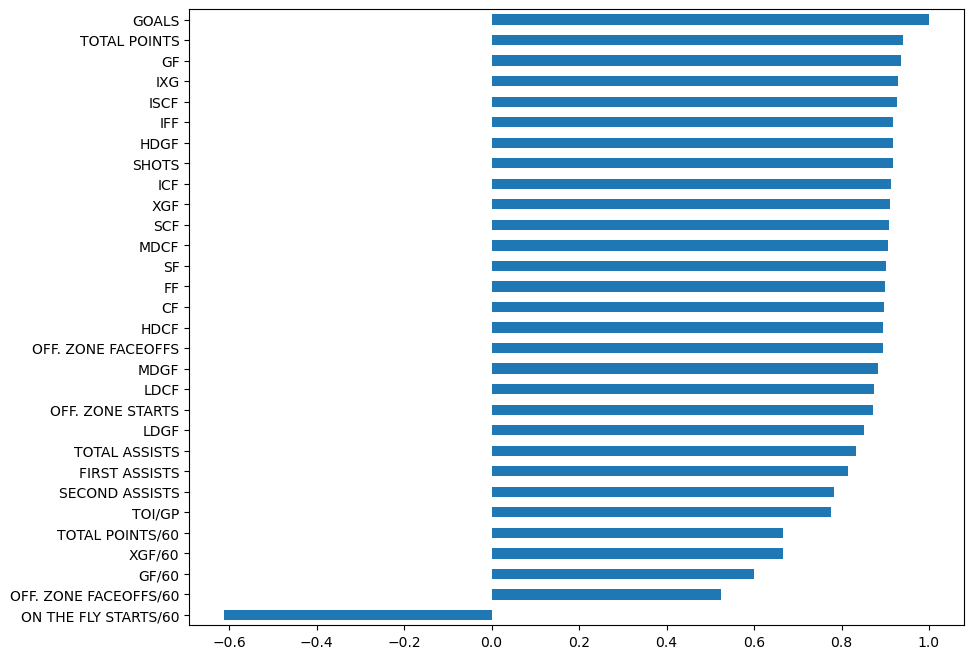

In [77]:
# Sort positive_corrs by 'GOALS/60'
goals_corrs = high_corrs['GOALS'].sort_values()

# Plot a bar graph of GOALS/60 vs. the top positively correlated features
plt.figure(figsize=(10, 8))
goals_corrs.plot(kind='barh')

In [93]:
high_goals_corrs = goals_corrs[goals_corrs.abs() > 0.8]
high_goals_corrs

FIRST ASSISTS         0.814111
TOTAL ASSISTS         0.832760
LDGF                  0.850499
OFF. ZONE STARTS      0.873079
LDCF                  0.873997
MDGF                  0.882708
OFF. ZONE FACEOFFS    0.894928
HDCF                  0.895736
CF                    0.897672
FF                    0.899934
SF                    0.900820
MDCF                  0.905934
SCF                   0.907561
XGF                   0.910833
ICF                   0.913431
SHOTS                 0.916634
HDGF                  0.917276
IFF                   0.917281
ISCF                  0.927610
IXG                   0.930226
GF                    0.934872
TOTAL POINTS          0.941541
GOALS                 1.000000
Name: GOALS, dtype: float64

### Results
Again we see that GOALS is extremely highly correlated with many of these other features. It is a no-brainer to use it in our model, mind you, since it is such an important aspect of hockey. Any interpretable model predicting a players value must absolutely have GOALS as a feature.

## Finding overlap in the sets of correlations
Prompt: For each of high_goals_corrs high_TotAssists_corrs high_GF_corrs high_TP_corrs high_XGF_corrs high_TOI_corrs please find the intersection for which they all have the same indices.

In [94]:
intersection_indices = high_goals_corrs.index.intersection(high_TotAssists_corrs.index).intersection(high_GF_corrs.index).intersection(high_TP_corrs.index).intersection(high_XGF_corrs.index).intersection(high_TOI_corrs.index)

In [96]:
# Remove 'FIRST ASSISTS', 'TOTAL ASSISTS', 'SHOTS', 'TOTAL POINTS', AND 'GOALS' from intersection_indices
intersection_indices = intersection_indices.drop(['FIRST ASSISTS', 'TOTAL ASSISTS', 'SHOTS', 'TOTAL POINTS', 'GOALS'])
intersection_indices

Index(['LDGF', 'OFF. ZONE STARTS', 'LDCF', 'MDGF', 'OFF. ZONE FACEOFFS',
       'HDCF', 'CF', 'FF', 'SF', 'MDCF', 'SCF', 'XGF', 'ICF', 'HDGF', 'IFF',
       'ISCF', 'IXG', 'GF'],
      dtype='object')

The columns contained in intersection_indices make good candidates for PCA.

## Finding Columns that are highly correlated with our **y** values that are not contained in the intersection
Next I would like to identify all of the columns that are highly correlated with our **y**'s that are not part of this intersection.

In [103]:
highly_correlated = correlation_Y_abs[:30].index

to_consider = highly_correlated.drop(intersection_indices)
to_consider


Index(['TOI/GP', 'TOTAL POINTS', 'TOTAL ASSISTS', 'FIRST ASSISTS', 'XGF/60',
       'ON THE FLY STARTS/60', 'OFF. ZONE FACEOFFS/60', 'TOTAL POINTS/60',
       'SHOTS', 'SECOND ASSISTS', 'GF/60', 'GOALS'],
      dtype='object')

From this set we can see that 'TOI/GP', 'TOTAL POINTS', 'TOTAL ASSISTS', 'FIRST ASSISTS', 'XGF/60', 'ON THE FLY STARTS/60', 'OFF. ZONE FACEOFFS/60', 'TOTAL POINTS/60', 'SHOTS', 'SECOND ASSISTS', 'GF/60', 'GOALS' are features that we may want to use directly (without PCA).

My intuition leads me to think we should use:
1. TOI/GP
2. TOTAL POINTS - although we may want to split this up into TOTAL ASSISTS and GOALS instead
3. TOTAL ASSISTS - although we may want to split this up into FIRST ASSISTS and SECOND ASSISTS instead
4. XGF/60 - This may not make sense to use, since it is so closely tied to XGA, which is part of the intersection
5. ON THE FLY STARTS/60 - This is probably covered by TOI/GP which it has a -.75 correlation with
6. OFF. ZONE FACEOFFS/60 - May make sense to be integrated into the PCA as it is a bit of a nuanced statistic
7. TOTAL POINTS/60 - Is too closely linked to TOTAL POINTS. We should use one or the other.
8. SHOTS - I think this would be a good metric to try to include.

# Non-Numerical Feature Analysis
Now that we have done a feature analysis for our numerical columns, we should take a look at our non-numerical columns and see if there is anything worth using.

In [104]:
# Select all non-numerical columns from the centers_21GP df
non_numeric_columns = forwards_41GP.select_dtypes(exclude=['number'])
non_numeric_columns

,POSITION,PLAYER,TEAM,DATE OF BIRTH,BIRTH CITY,BIRTH STATE/PROVINCE,BIRTH COUNTRY,NATIONALITY,DRAFT TEAM,COUNTRY,HANDED,DRAFTED,SIGNING TEAM,TYPE,CLAUSE,EXPIRY,SEASON
0,r,adam burish,chi,1983-01-06,Madison,WI,USA,USA,CHI,United States,Right,282 - Round 9 - 2002 (CHI),CHI,Entry-Level,NaN,RFA,2007-08
2,r,adam hall,pit,1980-08-14,Kalamazoo,MI,USA,USA,NSH,United States,Right,52 - Round 2 - 1999 (NSH),PIT,Standard (2-way),NaN,UFA,2007-08
3,r,ales hemsky,edm,1983-08-13,Pardubice,CZE,CZE,NaN,EDM,Czech Republic,Right,13 - Round 1 - 2001 (EDM),EDM,Standard (1-way),NaN,UFA,2007-08
4,r,ales kotalik,buf,1978-12-23,Jindrichuv Hradec,CZE,CZE,NaN,BUF,Czech Republic,Right,164 - Round 6 - 1998 (BUF),BUF,Standard (1-way),NaN,UFA,2007-08
6,l,alex ovechkin,wsh,1985-09-17,Moscow,RUS,RUS,NaN,WSH,Russia,Right,1 - Round 1 - 2004 (WSH),WSH,Entry-Level,NaN,RFA,2007-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12945,r,yegor chinakhov,cbj,2001-02-01,Omsk,RUS,RUS,NaN,CBJ,Russia,Left,21 - Round 1 - 2020 (CBJ),CBJ,Standard (1-way),NaN,RFA,2023-24
12946,c,yegor sharangovich,cgy,1998-06-06,Minsk,BLR,BLR,NaN,N.J,Belarus,Left,141 - Round 5 - 2018 (NJD),CGY,Standard (1-way),NaN,UFA,2023-24
12948,l,zach benson,buf,2005-05-12,CAN,69,163,NaN,BUF,Canada,Left,13 - Round 1 - 2023 (BUF),BUF,Entry-Level,NaN,RFA,2023-24
12951,l,zach hyman,edm,1992-06-09,Toronto,ON,CAN,CAN,FLA,Canada,Right,123 - Round 5 - 2010 (FLA),EDM,Standard (1-way),NMC,UFA,2023-24


# One-Hot-Encoding
Most of these features do not seem like anything that should impact the value of a player based on their on-ice performace; however, there is one feature here that intruiges me: handedness. Players are either left-handed or right-handed, and one may be more rare than the other, so it may impact the equation of supply and demand on the market.

Let's do a quick analysis of the counts for each to see if we should use it in our feature space.

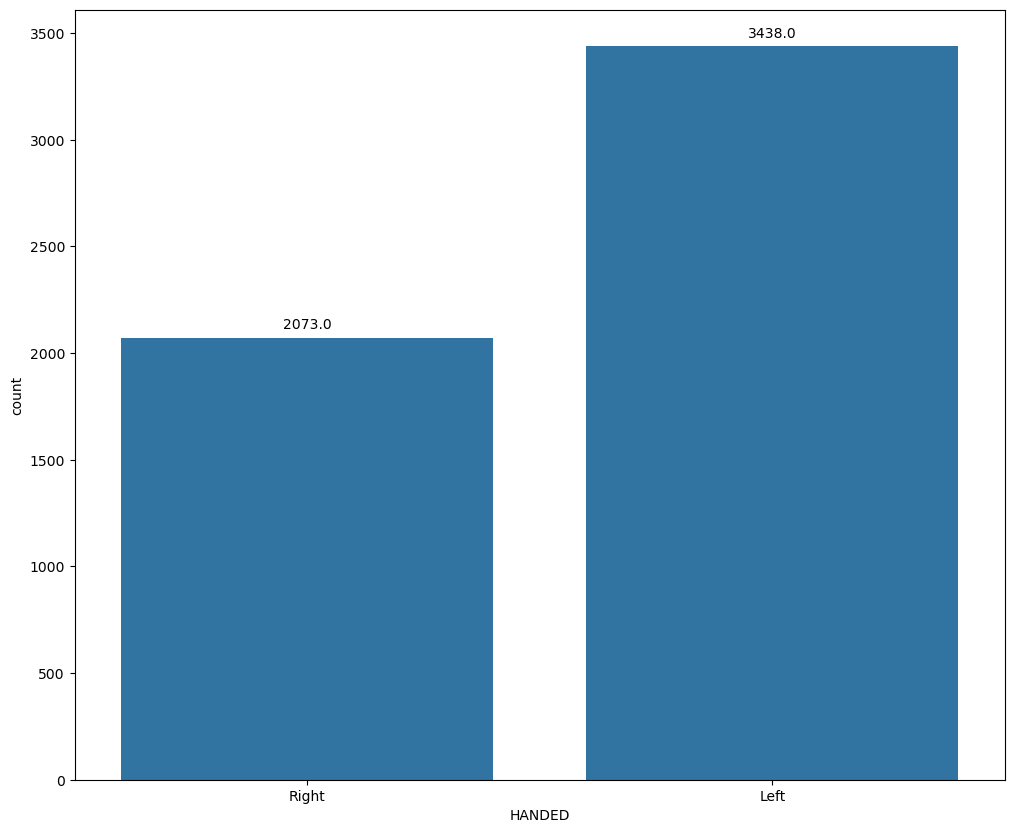

In [105]:
# Assuming centers_21GP is your DataFrame and 'HANDED' is the column of interest
plt.figure(figsize=(12, 10))
ax = sns.countplot(data=forwards_41GP, x='HANDED')

# Loop through each bar (patch) in the countplot
for p in ax.patches:
    # Get the height of the bar, which represents the count
    height = p.get_height()
    # Annotate the count above the bar
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), # Position for the annotation
                ha='center', va='center', # Alignment parameters
                xytext=(0, 9), # Distance from the top of the bar
                textcoords='offset points') # How the text is positioned

### Results
Interesting, as I suspected, the handedness is not distributed equally among players. Surprisingly, right handed players are a bit more than half as common as left handed players.

Text(0.5, 1.0, 'Salary Cap Percentage by Handedness')

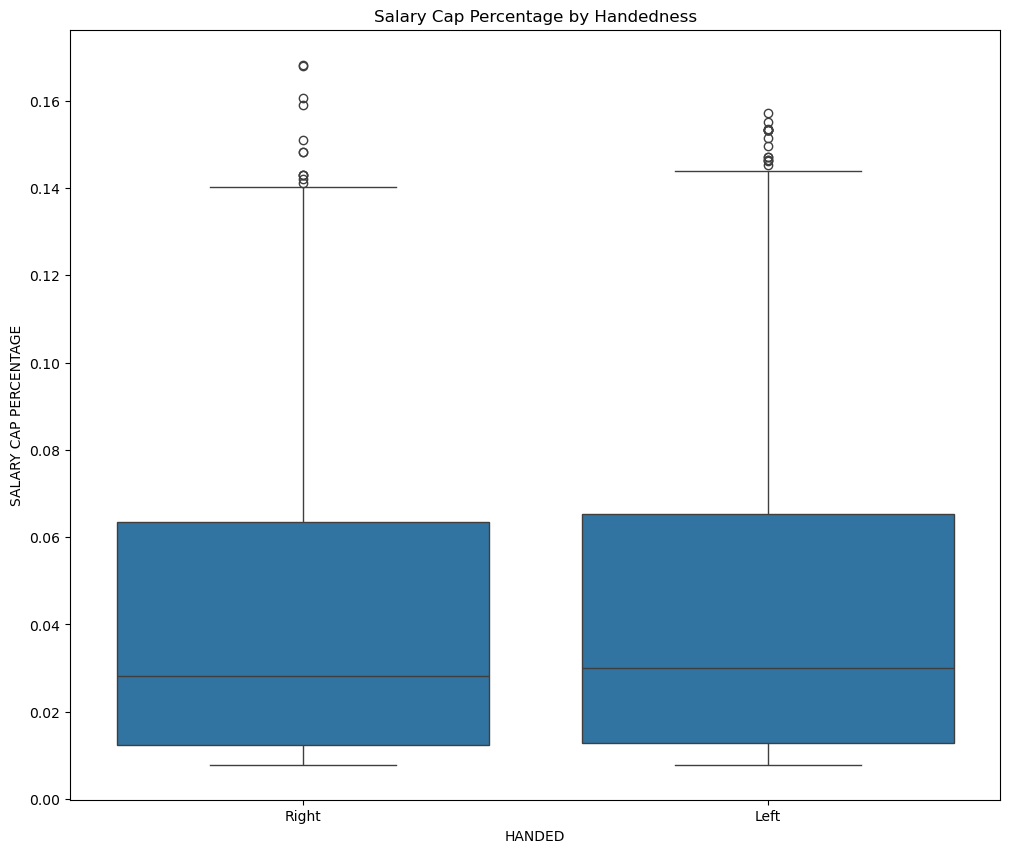

In [106]:
# Visualize a boxplot showing the relationship between handedness and salary cap percentage
plt.figure(figsize=(12, 10))
sns.boxplot(data=forwards_41GP, x='HANDED', y='SALARY CAP PERCENTAGE')

# Add a title to the plot
plt.title('Salary Cap Percentage by Handedness')

These results suggest that handedness may not in fact have a large impact on our model. Despite the fact that right handed players are less common, they do not seem to see a boost in market value. When considering outliers, however, ther ehave been a few to push the market limits.

# Conclusions on Numerical Features
Features to try include:
1. TOI/GP
2. TOTAL POINTS - although we may want to split this up into TOTAL ASSISTS and GOALS instead
3. TOTAL ASSISTS - although we may want to split this up into FIRST ASSISTS and SECOND ASSISTS instead
4. XGF/60 - This may not make sense to use, since it is so closely tied to XGA, which is part of the intersection
5. ON THE FLY STARTS/60 - This is probably covered by TOI/GP which it has a -.75 correlation with
6. OFF. ZONE FACEOFFS/60 - May make sense to be integrated into the PCA as it is a bit of a nuanced statistic
7. TOTAL POINTS/60 - Is too closely linked to TOTAL POINTS. We should use one or the other.
8. SHOTS - I think this would be a good metric to try to include.
9. We may want to include 'LDGF', 'OFF. ZONE STARTS', 'LDCF', 'MDGF', 'OFF. ZONE FACEOFFS',
       'HDCF', 'CF', 'FF', 'SF', 'MDCF', 'SCF', 'XGF', 'ICF', 'HDGF', 'IFF',
       'ISCF', 'IXG', 'GF' as a PCA

# Conclusions on Non-Numerical Features
There wasn't quite as much to consider here. I suspect we should not include handedness in our model.